In [42]:
#데이터 핸들링 라이브러리
import pandas as pd
import numpy as np
#데이터 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.family':'AppleGothic'})
mpl.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

## 용어 정리
- Imbalance 정도
    - Slight Imbalance: An imbalanced classification problem where the distribution of examples is uneven by a small
    amount in the training dataset (e.g. 4:6)
    - Severe Imbalance: An imbalanced classification problem where the distribution of examples is uneven by a large
    amount in the training dataset (e.g. 1:100 or more)
- class의 분류
    - Majority Class: The class (or classes) in an imbalanced classification predictive modeling problem that has
    many examples. (여기선 사망하지 않음(0))
    - Minority Class: The class in an imbalanced classification predictive modeling problem that has few examples.
    (여기선 사망함(1))

- Imbalance Classification 예
    - Fraud Detection.
    - Claim Prediction
    - Default Prediction.
    - Churn Prediction.
    - Spam Detection.
    - Anomaly Detection.
    - Outlier Detection.
    - Intrusion Detection
    - Conversion Prediction.

### Imbalance Classification에서 정확도accuracy가 좋은 척도일까?
- 아님!
- 만약 1000명중 한 명이 걸리는 회귀병이 있는데 잠복기동안 아무 증상이 없다 갑자기 죽는 병이라 하자.
    - 이 병을 밝힐 수 있는 장치는 진단기 A밖에 없다. 고 하자 이 진단기 A가 어느날 고장이 나서 무조건 음성판정만을 내렸다고 하자.
    - 그리고 이 고장난 사실을 아무도 모른채 계속 사용되었다고 하자. 이 기계는 999/1000의 높은 정확도를 가진 기계였지만, 회귀병을 탐지한다는 기계 본래의 목적에는 전혀 부합하지 못한 고철덩어리에 불과했던 것이다 (비유 출처: 본인)
    - 양성인 사실을 놓치는 것이 심각한 생명,신체상의 손해를 끼칠수 있는 경우 정확도accuracy가 높은것 보다도 재현율recall(실제 양성인 경우에서 양성이라 판정되는 비율)이 더 중요하다 볼수 있다
    - [참고](https://en.wikipedia.org/wiki/Accuracy_paradox)
### 레퍼런스
- [imbalanced classification](https://machinelearningmastery.com/what-is-imbalanced-classification/)


## 데이터 전처리 계획
1. 데이터 불러오기, 결측치 처리하기
2. 상대적으로 중요성이 떨어져보이는 피처 삭제, 필요하면 피처명을 직관적으로 다시 네이밍하기
3. 비숫자-문자열 독립변수 인코딩하기
4. 데이터 정규화
5. 훈련-테스트셋 분리

## 모델 학습 계획
1. 모델 생성
2. Cross_validation을 통한 모델학습
3. Accuracy, Precision,Recall, ROC 4개의 지표로 분류모델의 정확도 평가하기

In [67]:
#1. 데이터 불러오기 from TAAS: http://taas.koroad.or.kr/web/shp/sbm/initGisAnals.do?menuId=WEB_KMP_GIS_TAS
## 해당 경로에 있는 .csv 파일명 리스트 가져오기

import os
import time
t_0= time.time()

path = '../교통사고_2021/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.xls')] ## 파일명 끝이 .xls인 경우

## csv 파일들을 DataFrame으로 불러와서 concat

death_df_org = pd.DataFrame()
for i in file_list_py:
    data = pd.read_html(path + i)
    data= data[0]
    death_df_org = pd.concat([death_df_org,data])

death_df_org = death_df_org.reset_index(drop = True)
print(f'데이터 불러오기 및 통합에 걸린 시간은 {str(time.time()-t_0)} 입니다')
death_df= death_df_org.copy()

데이터 불러오기 및 통합에 걸린 시간은 30.504735946655273 입니다


In [68]:
"""
결측치 확인하기 => 피해운전자의 차종,성별,연령,상해정도를 파악하지 못하는 데이터가 6687건이 존재함
원본데이터 194094에 비하면 삭제해도 학습에 영향력을 크게 미치지 못할 뿐더러, 이러한 데이터들이
특정 편향성을 갖고 존재할 것이라 보기 어렵다(아마도 기록 누락에 의해 이러한 데이터가 존재할 것이기 때문)
그렇기 때문에 데이터를 제거해도 될것이라 판단하였음
"""
death_df.isnull().sum()
death_df.dropna(inplace=True)
death_df.isnull().sum()

사고번호          0
사고일시          0
요일            0
시군구           0
사고내용          0
사망자수          0
중상자수          0
경상자수          0
부상신고자수        0
사고유형          0
법규위반          0
노면상태          0
기상상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
피해운전자 차종      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
dtype: int64

In [69]:
#데이터 데이터타입, 데이터갯수 확인하기
print(death_df.info())
death_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187407 entries, 2 to 194093
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사고번호        187407 non-null  int64 
 1   사고일시        187407 non-null  object
 2   요일          187407 non-null  object
 3   시군구         187407 non-null  object
 4   사고내용        187407 non-null  object
 5   사망자수        187407 non-null  int64 
 6   중상자수        187407 non-null  int64 
 7   경상자수        187407 non-null  int64 
 8   부상신고자수      187407 non-null  int64 
 9   사고유형        187407 non-null  object
 10  법규위반        187407 non-null  object
 11  노면상태        187407 non-null  object
 12  기상상태        187407 non-null  object
 13  도로형태        187407 non-null  object
 14  가해운전자 차종    187407 non-null  object
 15  가해운전자 성별    187407 non-null  object
 16  가해운전자 연령    187407 non-null  object
 17  가해운전자 상해정도  187407 non-null  object
 18  피해운전자 차종    187407 non-null  object
 19  피해운전자 성별    187407 non-

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
2,2021010100100040,2021년 1월 1일 08시,금요일,강원도 강릉시 강문동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,화물,남,53세,상해없음,보행자,여,20세,중상
3,2021010100100065,2021년 1월 1일 11시,금요일,강원도 강릉시 옥계면,경상사고,0,0,4,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,43세,상해없음,화물,남,49세,경상
4,2021010100100089,2021년 1월 1일 13시,금요일,강원도 동해시 천곡동,경상사고,0,0,2,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,62세,상해없음,승용,남,24세,경상
5,2021010100100123,2021년 1월 1일 15시,금요일,강원도 강릉시 포남동,사망사고,1,0,0,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,원동기,남,16세,상해없음,승용,여,50세,상해없음
6,2021010100100146,2021년 1월 1일 17시,금요일,강원도 강릉시 옥천동,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,교차로 - 교차로부근,승용,여,33세,상해없음,승용,남,27세,경상


## 종속변수의 카테고리 비율 확인하기
- 전체 교통사고중 사망사고의 비율은 약 1.15%로, 낮은 비율을 차지하고 있다

In [70]:
print(death_df['사고내용'].value_counts())
ratio=2149/(138186+47072+2149)
print(f'전체 사고중 사망사고의 비율은 {str(ratio*100)}% 입니다')

경상사고    138186
중상사고     47072
사망사고      2149
Name: 사고내용, dtype: int64
전체 사고중 사망사고의 비율은 1.1467020975737299% 입니다


## 컬럼 핸들링하기
- 불필요해보이는 컬럼 제거하기
    1. 사고번호는 각 사고에 대해 일대일 대응되는 key값으로 나중에 데이터를 결합시키는데 사용될 수 있어 보이나, 일단
    지금 당장 사용되지 않으므로 삭제한다
    2. 사망자수,중상자수,경상자수,부상신고자는 '피해운전자 상해정도'에 필요한 정보가 담겨있으므로 삭제한다
    3. 위치정보는 사용하지 않으므로 시군구도 삭제한다
- 종속변수 '사고내용'에서 사망자를 1, 중상,경상을 0으로 하는 새로운 종속변수 열 '사망사고여부' 을 만들기
- 발생년월시에서 시간만 떼어내고, 정수형으로 데이터 변환하고, 22~06시를 야간, 그외 시간을 주간으로 분류하는 독립변수 열 '야간여부' 만들기
- 피해운전자, 가해운전자 연령에서 '세' 단위 떼어내고 정수형으로 데이터 변환하기
- '야간여부'와 '사망사고여부'를 정수로 데이터변환하기

In [71]:
# 경상,중상사고는 0, 사망사고는 1로 라벨링한다
index1= death_df['사고내용']=='사망사고'
death_df['사망사고여부']=index1
death_df


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망사고여부
2,2021010100100040,2021년 1월 1일 08시,금요일,강원도 강릉시 강문동,중상사고,0,1,0,0,차대사람 - 횡단중,...,단일로 - 기타,화물,남,53세,상해없음,보행자,여,20세,중상,False
3,2021010100100065,2021년 1월 1일 11시,금요일,강원도 강릉시 옥계면,경상사고,0,0,4,0,차대차 - 측면충돌,...,교차로 - 교차로안,승용,남,43세,상해없음,화물,남,49세,경상,False
4,2021010100100089,2021년 1월 1일 13시,금요일,강원도 동해시 천곡동,경상사고,0,0,2,0,차대차 - 측면충돌,...,단일로 - 기타,승용,남,62세,상해없음,승용,남,24세,경상,False
5,2021010100100123,2021년 1월 1일 15시,금요일,강원도 강릉시 포남동,사망사고,1,0,0,0,차대차 - 측면충돌,...,교차로 - 교차로안,원동기,남,16세,상해없음,승용,여,50세,상해없음,True
6,2021010100100146,2021년 1월 1일 17시,금요일,강원도 강릉시 옥천동,경상사고,0,0,2,0,차대차 - 추돌,...,교차로 - 교차로부근,승용,여,33세,상해없음,승용,남,27세,경상,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194089,2021123100100335,2021년 12월 31일 16시,금요일,충청남도 천안시 동남구 광덕면,경상사고,0,0,3,0,차대차 - 측면충돌,...,교차로 - 교차로안,승용,여,32세,경상,승용,남,42세,경상,False
194090,2021123100100383,2021년 12월 31일 17시,금요일,충청남도 부여군 장암면,중상사고,0,1,0,0,차대차 - 추돌,...,단일로 - 기타,승용,남,24세,상해없음,자전거,남,78세,중상,False
194091,2021123100100384,2021년 12월 31일 17시,금요일,충청남도 천안시 동남구 청당동,경상사고,0,0,3,0,차대차 - 측면충돌,...,단일로 - 기타,승용,남,25세,경상,승용,남,22세,경상,False
194092,2021123100100578,2021년 12월 31일 21시,금요일,충청남도 보령시 명천동,경상사고,0,0,1,0,차대차 - 추돌,...,기타 - 기타,승용,남,59세,상해없음,승용,여,28세,경상,False


In [72]:
#불필요해보이는 컬럼 제거
death_df.drop(['사고번호','시군구','사망자수','중상자수',
               '경상자수','부상신고자수','노면상태','가해운전자 상해정도','피해운전자 상해정도','사고내용'],axis=1,inplace=True)

##시간에 따른 시계가 교통사고의 요인중 하나일 수 있으므로 발생년월일시에서 시간만 떼어 새로운 컬럼으로 만듬
time_lst= list(death_df['사고일시'])
hour_lst=[]
for time in time_lst:
    hour_lst.append((str(time)[-3:-1]))
death_df['사고시각']= hour_lst

#사고일시 컬럼은 삭제
death_df.drop(['사고일시'],axis=1,inplace=True)

#피해운전자, 가해운전자 연령 미분류 삭제하기
idx= death_df[death_df['피해운전자 연령']=='미분류'].index
death_df.drop(idx,inplace=True)
idx= death_df[death_df['피해운전자 연령']=='98세 이상'].index
death_df.drop(idx,inplace=True)

idx2= death_df[death_df['가해운전자 연령']=='미분류'].index
death_df.drop(idx2,inplace=True)

#나이 컬럼: 숫자단위만 뽑아서 대체하기
suspect_lst= list(death_df['가해운전자 연령'])
suspect_old= []
for old in suspect_lst:
    suspect_old.append((old)[:-1])

death_df['가해운전자 연령']=suspect_old

victim_lst= list(death_df['피해운전자 연령'])
victim_old= []
for old in victim_lst:
    victim_old.append((old)[:-1])
death_df['피해운전자 연령']=victim_old



In [73]:
#사고시각에서 22시부터 06시까지를 야간으로, 그외 시간을 야간X로 이진분류하기
index2= death_df['사고시각']=='22','23','24','1','2','3','4','5','6'
death_df['야간여부']=index2[0]
death_df.drop(['사고시각'],axis=1,inplace=True)

In [74]:
#y(종속변수)가 데이터프레임 끝에 오도록 재배치하기
death_df=death_df.reindex(columns=['야간여부','사고유형','법규위반','기상상태','도로형태',
                                   '가해운전자 차종','가해운전자 성별','가해운전자 연령',
                                   '피해운전자 차종','피해운전자 성별','피해운전자 연령','사망사고여부'])

In [75]:
#데이터 자료형 변환: 문자열-> 정수형
death_df['가해운전자 연령']=death_df['가해운전자 연령'].astype('int')
death_df['피해운전자 연령']=death_df['피해운전자 연령'].astype('int')

In [76]:
#사망사고여부와 야간여부를 boolean에서 정수형으로 변환한다
death_df['야간여부']= death_df['야간여부'].astype(int)
death_df['사망사고여부']= death_df['사망사고여부'].astype(int)


## 범주형 변수 인코딩하기(한번만 인코딩 해야됨 두번하면 안됨)
- 랜덤 포레스트나 트리 기반 알고리즘의 경우 LabelEncdoer를 활용한 인코딩을 하여도 되나, 그 외의 경우 One-Hot Encoding을 하여야 한다
- One-Hot Encoding으로 sklearn에도 모듈이 있지만 pd.get_dummies가 사용편의성이 좋은것 같다
- [아 졸려](https://blog.roboflow.com/precision-and-recall/#precision-and-recall-examples)

In [53]:
features=['사고유형','법규위반','기상상태','도로형태',
         '가해운전자 차종','가해운전자 성별',
         '피해운전자 차종','피해운전자 성별']
encoded_df= pd.get_dummies(data=death_df,columns=features,prefix=features)
encoded_df

,야간여부,가해운전자 연령,피해운전자 연령,사망사고여부,사고유형_차대사람 - 기타,사고유형_차대사람 - 길가장자리구역통행중,사고유형_차대사람 - 보도통행중,사고유형_차대사람 - 차도통행중,사고유형_차대사람 - 횡단중,사고유형_차대차 - 기타,...,피해운전자 차종_사륜오토바이(ATV),피해운전자 차종_승용,피해운전자 차종_승합,피해운전자 차종_원동기,피해운전자 차종_이륜,피해운전자 차종_자전거,피해운전자 차종_특수,피해운전자 차종_화물,피해운전자 성별_남,피해운전자 성별_여
2,0,53,20,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,43,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,62,24,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,16,50,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,0,33,27,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194089,0,32,42,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
194090,0,24,78,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
194091,0,25,22,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
194092,0,59,28,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## 이상치 데이터 제거하기
- 데이터를 작은값부터 큰값으로 나열한다고 하자 이러한 데이터의 크기순서를 0%~100%로 표기한다
- 25~75%구간을 IQR(Inter Quantile Range)이라 정의한다
- 이상치는 임의로 정의하는데 보통 사용하는 방법은 최솟값에서 1.5IQR를 뺀값을, 최댓값에서 1.5IQR을 더한값을 경계로 하여 그 경계 바깥에 있는 데이터값을 이상치로 간주하는 것이다

In [54]:
def get_outlier(df=None,Target_name=None,column=None, weight=1.5):
    positive=df[df[Target_name]==1][column]
    quantile_25= np.percentile(positive.values,25)
    quantile_75= np.percentile(positive.values,75)
    #IQR을 구하고, IQR에 1.5을 곱해 최댓값과 최솟값 지점을 구한다
    IQR = quantile_75 - quantile_25
    IQR_weight= IQR * weight
    lowest_val = quantile_25- IQR_weight
    highest_val= quantile_75- IQR_weight
    #최댓값보다 크거나 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame 인덱스를 반환한다
    outlier_index= positive[(positive<lowest_val)|(positive>highest_val)].index
    return outlier_index


def drop_outlier(df=None,target_name=None,weight=1.5):
    df_copy= df.copy()
    col_names= list(df.columns)
    for col_name in col_names:
        outlier_index= get_outlier(df=df,Target_name=target_name,column=col_name,weight=1.5)
        #outlier로서 중복된 로가 존재할수도 있으므로 try-except구문을 시행한다
        try:
            df_copy.drop(outlier_index,axis=0,inplace=True)
        except:
            pass
    return df_copy



preprocessed_df= drop_outlier(encoded_df,target_name='사망사고여부',weight=1.5)
preprocessed_df

,야간여부,가해운전자 연령,피해운전자 연령,사망사고여부,사고유형_차대사람 - 기타,사고유형_차대사람 - 길가장자리구역통행중,사고유형_차대사람 - 보도통행중,사고유형_차대사람 - 차도통행중,사고유형_차대사람 - 횡단중,사고유형_차대차 - 기타,...,피해운전자 차종_사륜오토바이(ATV),피해운전자 차종_승용,피해운전자 차종_승합,피해운전자 차종_원동기,피해운전자 차종_이륜,피해운전자 차종_자전거,피해운전자 차종_특수,피해운전자 차종_화물,피해운전자 성별_남,피해운전자 성별_여
2,0,53,20,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,43,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,62,24,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,16,50,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,0,33,27,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194089,0,32,42,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
194090,0,24,78,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
194091,0,25,22,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
194092,0,59,28,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [55]:
#데이터 분리시키기
y=preprocessed_df['사망사고여부']
X=preprocessed_df.drop(['사망사고여부'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)

#X_train,y_train을 다시 학습과 검증 데이터셋으로 분리
X_tr,X_val, y_tr,y_val =train_test_split(X_train,y_train,test_size=0.3,random_state=0)

## 머신러닝 모듈 정리

In [56]:
#머신러닝 모듈 정리해두기

""""Binarizer: 문턱값(threshold)를 설정하여 그 이상값을 입력받으면 1을, 아니면 0을 반환하는 함수.
보통 pred_proba란 함수가 특정 카테고리에 대한 확률값을 제공하는 함수인데, 지금 이 예제와 같이 y의 0과 1의 비율이 크게 차이가
나는 경우 1에 대한 예측 확률이 크게 작다. 원래는 1에 대한 pred_proba 예측이 0.5이상 일때 1을 예측하는데, Binarizer를 통해
1을 예측하기 위한 확률 문턱값을 낮출수 있고, 그를 통해 재현율(실제 1일일때 1을 예측하는 비율)을 높일 수 있다"""
from sklearn.preprocessing import Binarizer

#GridSearchCV 라이브러리(HyperParameter를 일일히 대입하여 최적의 파라미터를 찾는 알고리즘)
from sklearn.model_selection import GridSearchCV

#머신러닝 성능 지표 관련 라이브러리
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,recall_score

#머신러닝 Gradient Boost 계열 라이브러리
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#머신러닝 로지스틱 회귀 라이브러리
from sklearn.linear_model import LogisticRegression


# 머신러닝- 로지스틱 회귀

In [57]:
#모델1. 로지스틱 회귀

lr_clf= LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
y_pred= lr_clf.predict(X_test)
y_pred_proba= lr_clf.predict_proba(X_test)[:,1]

#모델 평가
roc_val= roc_auc_score(y_test,y_pred_proba)
recall_val= recall_score(y_test,y_pred)
accuracy_val= accuracy_score(y_test,y_pred)
precision_val= precision_score(y_test,y_pred)

print('\n--------------------------------------')
print(f'ROC_AUC는 {roc_val} 입니다')
print(f'recall_score는 {recall_val} 입니다')
print(f'precision_score는 {precision_val} 입니다')
print(f'accuracy_score는 {accuracy_val} 입니다')
print('--------------------------------------')




--------------------------------------
ROC_AUC는 0.8796104607415606 입니다
recall_score는 0.013774104683195593 입니다
precision_score는 0.4166666666666667 입니다
accuracy_score는 0.9901175069042075 입니다
--------------------------------------


/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
#모델1-2. 로지스틱 회귀: Binarizer 적용하기

lr_clf= LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
y_pred= lr_clf.predict(X_test)
y_pred_proba= lr_clf.predict_proba(X_test)[:,1]

#Binarizer 적용하기
custom_threshold= 0.01
pred_proba_1= lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)
binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

#모델 평가
roc_val= roc_auc_score(y_test,y_pred_proba)
recall_val= recall_score(y_test,custom_predict)
accuracy_val= accuracy_score(y_test,custom_predict)
precision_val= precision_score(y_test,custom_predict)

print('\n--------------------------------------')
print(f'ROC_AUC는 {roc_val} 입니다')
print(f'recall_score는 {recall_val} 입니다')
print(f'precision_score는 {precision_val} 입니다')
print(f'accuracy_score는 {accuracy_val} 입니다')
print('--------------------------------------')



--------------------------------------
ROC_AUC는 0.8796104607415606 입니다
recall_score는 0.8264462809917356 입니다
precision_score는 0.03366625519021434 입니다
accuracy_score는 0.7651486435262901 입니다
--------------------------------------


/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


변환된 분류 결정 임계값 배열의 shape: (36573,)


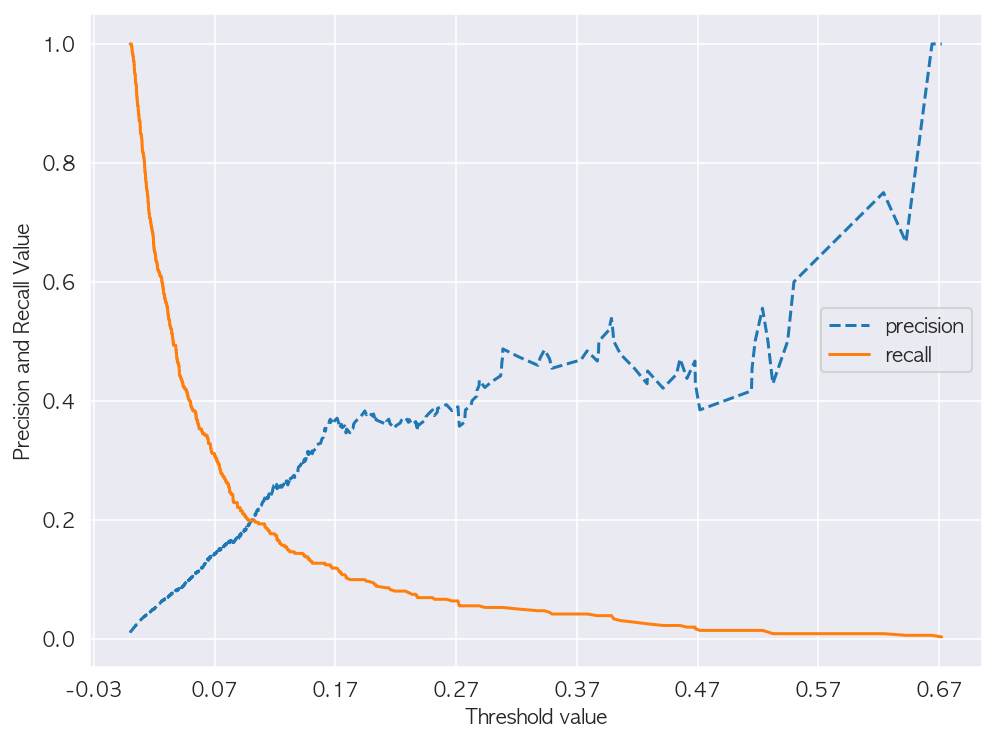

In [59]:
#모델 1-3. Precision-Recall Curve 시각화

from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 셋과 레이블 값이 1일때의 예측 확률을 precision_recall_curve 인자로 입력한다
precisions, recalls, thresholds= precision_recall_curve(y_test,pred_proba_class1)
print(f'변환된 분류 결정 임계값 배열의 shape:',thresholds.shape)

#임계값을 thresholds.shape[0] // 50으로 하자
thr_index= np.arange(0,thresholds.shape[0],thresholds.shape[0]//50)
# print(f'샘플 추출을 위한 임계값 배열의 index 20개 {thr_index}')
# print(f'샘플용 50개 임계값 {np.round(thresholds[thr_index],2)}')
#
# # thresholds.shape[0] // 50 스텝 단위로 추출된 임계값에 따른 정밀도와 재현율 값
# print(f'샘플 임계값별 정밀도 {np.round(precisions[thr_index],3)}')
# print(f'샘플 임계값별 재현율 {np.round(recalls[thr_index],3)}')

def precision_recall_curve_plot(y_test,pred_proba_c1):
    #threshold array와 이 threshold에 따른 정밀도, 재현율을 반환한다
    precisions, recalls, thresholds= precision_recall_curve(y_test,pred_proba_c1)

    #x축을 threshold값으로, y축을 정밀도, 재현율 값으로 각각 plot을 수행한다. 정밀도는 점선으로 표기한다
    plt.figure(figsize=(8,6))
    threshold_boundary= thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

    #thresholds 값 X축의 scale을 0.1 단위로 변경한다
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    #x축, y축, label과 legend, 그리고 grid를 설정한다
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall Value')
    plt.legend(loc='best')
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [60]:
# 2-1 GridSearchCV를 적용한 로지스틱 회귀
params= {
         'solver':['liblinear','lbfgs'],
         'penalty':['l2','l1'],
         'C':[0.01,0.1,1,5,10]}

#레이블(y)이 0인것의 가중치를 0.1, 1인것의 가중치를 0.9로 정한다
lr_clf= LogisticRegression({0:0.1,1:0.9})

grid_clf= GridSearchCV(lr_clf,param_grid=params, scoring='precision', cv=3)
grid_clf.fit(X_train,y_train)
print(f'최적 하이퍼 파라미터는 {grid_clf.best_params_}이고 최적 평균 재현율은 {grid_clf.best_score_}입니다')
y_pred= grid_clf.predict(X_test)
y_pred_proba= grid_clf.predict_proba(X_test)[:,1]

#모델 평가
roc_val= roc_auc_score(y_test,y_pred_proba)
recall_val= recall_score(y_test,custom_predict)
accuracy_val= accuracy_score(y_test,custom_predict)
precision_val= precision_score(y_test,custom_predict)

print('\n--------------------------------------')
print(f'ROC_AUC는 {roc_val} 입니다')
print(f'recall_score는 {recall_val} 입니다')
print(f'precision_score는 {precision_val} 입니다')
print(f'accuracy_score는 {accuracy_val} 입니다')
print('--------------------------------------')

/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/sklearn/lin

최적 하이퍼 파라미터는 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}이고 최적 평균 재현율은 0.4825396825396826입니다

--------------------------------------
ROC_AUC는 0.8726194180714777 입니다
recall_score는 0.8264462809917356 입니다
precision_score는 0.03366625519021434 입니다
accuracy_score는 0.7651486435262901 입니다
--------------------------------------


['야간여부',
 '가해운전자 연령',
 '피해운전자 연령',
 '사망사고여부',
 '사고유형_차대사람 - 기타',
 '사고유형_차대사람 - 길가장자리구역통행중',
 '사고유형_차대사람 - 보도통행중',
 '사고유형_차대사람 - 차도통행중',
 '사고유형_차대사람 - 횡단중',
 '사고유형_차대차 - 기타',
 '사고유형_차대차 - 정면충돌',
 '사고유형_차대차 - 추돌',
 '사고유형_차대차 - 측면충돌',
 '사고유형_차대차 - 후진중충돌',
 '사고유형_철길건널목 - 철길건널목',
 '법규위반_과속',
 '법규위반_교차로운행방법위반',
 '법규위반_기타',
 '법규위반_보행자보호의무위반',
 '법규위반_불법유턴',
 '법규위반_신호위반',
 '법규위반_안전거리미확보',
 '법규위반_안전운전불이행',
 '법규위반_중앙선침범',
 '법규위반_직진우회전진행방해',
 '법규위반_차로위반',
 '기상상태_기타',
 '기상상태_눈',
 '기상상태_맑음',
 '기상상태_비',
 '기상상태_안개',
 '기상상태_흐림',
 '도로형태_교차로 - 교차로부근',
 '도로형태_교차로 - 교차로안',
 '도로형태_교차로 - 교차로횡단보도내',
 '도로형태_기타 - 기타',
 '도로형태_단일로 - 고가도로위',
 '도로형태_단일로 - 교량',
 '도로형태_단일로 - 기타',
 '도로형태_단일로 - 지하차도(도로)내',
 '도로형태_단일로 - 철길건널목',
 '도로형태_단일로 - 터널',
 '도로형태_미분류 - 미분류',
 '도로형태_주차장 - 주차장',
 '가해운전자 차종_개인형이동수단(PM)',
 '가해운전자 차종_건설기계',
 '가해운전자 차종_기타불명',
 '가해운전자 차종_농기계',
 '가해운전자 차종_사륜오토바이(ATV)',
 '가해운전자 차종_승용',
 '가해운전자 차종_승합',
 '가해운전자 차종_원동기',
 '가해운전자 차종_이륜',
 '가해운전자 차종_자전거',
 '가해운전자 차종_특수',
 '가해운전자 차종_화물',
 '가해운전자 성별_기타불명',
 '가해운전